In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
X_train= pd.DataFrame(np.loadtxt(r'C:\Users\suruc\OneDrive\Desktop\ML_Assignment\assignment1\task1\UCI HAR Dataset\train\X_train.txt'))

In [5]:
X_train.shape

X_train.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
5833,0.245796,-0.010874,-0.113862,-0.111226,-0.057144,-0.419406,-0.219669,-0.055290,-0.429425,0.014885,...,-0.041401,-0.325520,-0.726510,0.796173,-0.211531,-0.978700,0.107133,-0.760737,0.263353,0.024608
6792,0.412214,-0.049787,-0.171298,0.005875,-0.159013,0.079105,-0.091228,-0.160152,0.027662,0.328099,...,-0.049453,-0.475866,-0.836211,-0.545735,0.347236,-0.905622,0.091228,-0.805715,0.227345,-0.020070
122,0.327465,-0.035667,-0.181824,-0.367220,0.034415,-0.194023,-0.418385,0.012210,-0.196416,-0.050131,...,0.196054,-0.481467,-0.752269,-0.296485,0.623604,-0.299839,0.175934,-0.783154,0.246745,0.037847
2549,0.277440,-0.028086,-0.118412,-0.996620,-0.927676,-0.972294,-0.997346,-0.931405,-0.971788,-0.939837,...,-0.166341,-0.210792,-0.613367,-0.022456,-0.155414,0.247498,-0.112257,-0.826816,0.184489,-0.068699
6459,0.280151,-0.025720,-0.093872,-0.985090,-0.918523,-0.828732,-0.987790,-0.929773,-0.813795,-0.915373,...,-0.152949,0.031420,-0.379779,-0.101008,0.156695,0.865857,0.567482,-0.766822,0.248462,0.077582


In [6]:
X_train.isnull().sum().sum()

0

In [7]:
std = np.std(X_train, axis=1)
std_diff= np.max(std)- np.min(std)
std_diff

0.18036178044381734

3. Visualize the data using PCA. **[1 marks]**
    * Use PCA (Principal Component Analysis) on Total Acceleration $(acc_x^2+acc_y^2+acc_z^2)$ to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities. 

In [8]:
import numpy as np
import os
import pandas as pd 

# Define the directory path
base_dir = r"C:\Users\suruc\OneDrive\Desktop\ML_Assignment\Combined\Train"

# Initialize lists to hold data and labels
data = []
labels = []

# Iterate through each activity class folder
for activity in os.listdir(base_dir):
    activity_dir = os.path.join(base_dir, activity)

    # Iterate through each subject file in the activity folder
    for file_name in os.listdir(activity_dir):
        file_path = os.path.join(activity_dir, file_name)

        # Load the CSV file
        df = pd.read_csv(file_path)

        # Compute total acceleration
        df['total_acceleration'] = df['accx']**2 + df['accy']**2 + df['accz']**2

        df = df[300:800]

        # Append the total acceleration and label to the lists
        data.append(df['total_acceleration'].values)
        labels.append(activity)

# Convert data and labels to a numpy array
data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

Data shape: (126, 500)
Labels shape: (126,)


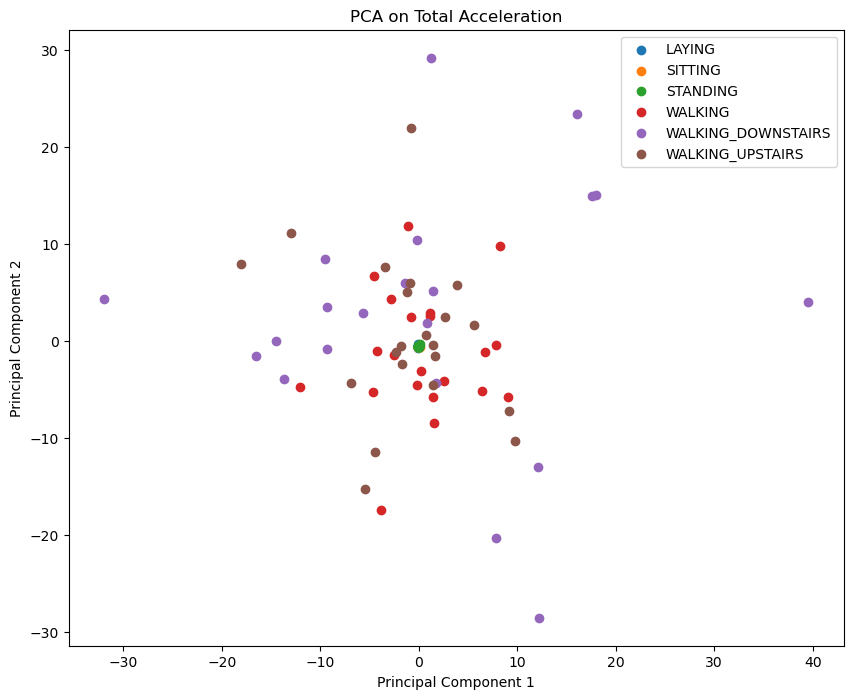

In [9]:

# Standardize the data before applying PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 8))
for activity in np.unique(labels):
    plt.scatter(pca_result[labels == activity, 0], pca_result[labels == activity, 1], label=activity)

plt.title("PCA on Total Acceleration")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

    *Next, use [TSFEL](https://tsfel.readthedocs.io/en/latest/) ([a featurizer library](https://github.com/fraunhoferportugal/tsfel)) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of   activities. 

*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\suruc\AppData\Local\Temp\ipykernel_3648\3790162011.py:10: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, seq)



*** Feature extraction finished ***


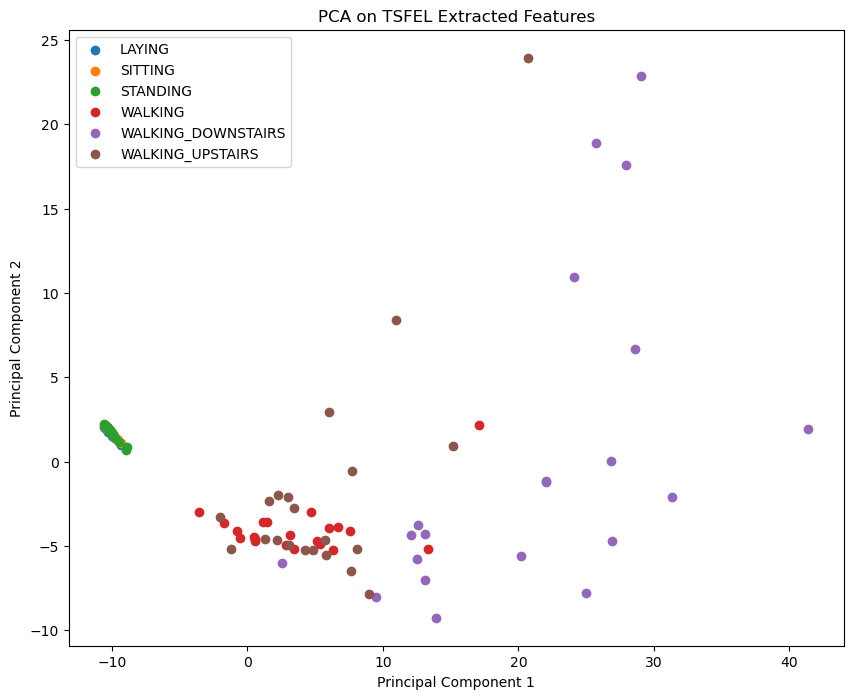

In [10]:
import tsfel
# Define the TSFEL feature extraction settings
cfg = tsfel.get_features_by_domain()

# Initialize a list to hold all extracted features
extracted_features = []

# Extract features from each sequence
for seq in data:
    features = tsfel.time_series_features_extractor(cfg, seq)
    extracted_features.append(features)

# Concatenate all individual DataFrames into a single DataFrame
features_df = pd.concat(extracted_features, ignore_index=True)

# Handle NaN values (choose one strategy)
# Option 1: Fill NaN values with 0
features_df_filled = features_df.fillna(0)

# Option 2: Drop rows with NaN values
# features_df_dropped = features_df.dropna()

# Standardize the features before applying PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df_filled)

# Apply PCA
pca_features = PCA(n_components=2)
pca_result_features = pca_features.fit_transform(features_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 8))
for activity in np.unique(labels):
    plt.scatter(pca_result_features[labels == activity, 0], pca_result_features[labels == activity, 1], label=activity)

plt.title("PCA on TSFEL Extracted Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

  *  Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

Feature data shape: (7352, 561)
Labels shape: (7352,)


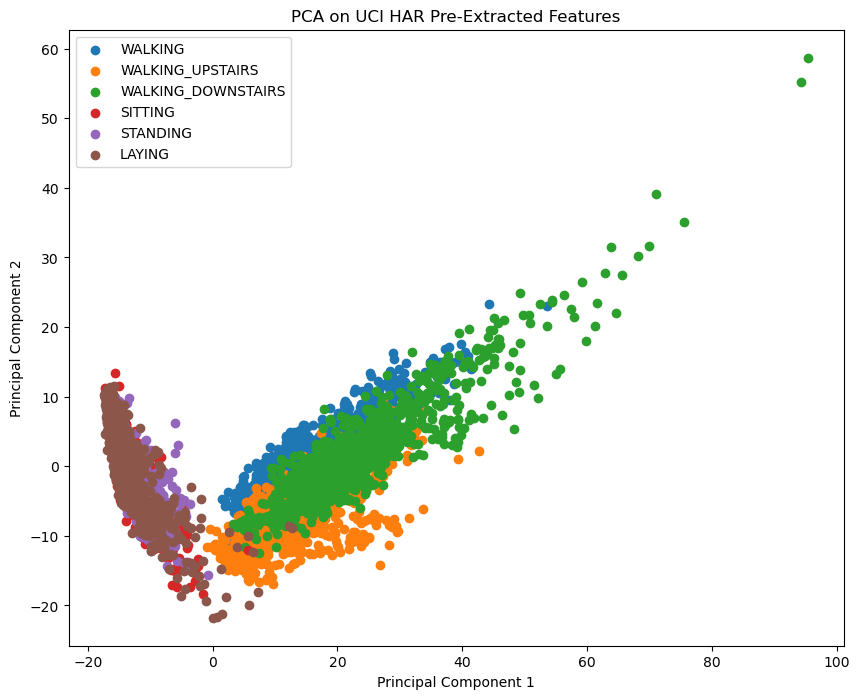

In [17]:
# Load the pre-extracted features from the dataset
feature_data = pd.read_csv(r'C:\Users\suruc\OneDrive\Desktop\ML_Assignment\assignment1\task1\UCI HAR Dataset\train\X_train.txt', delim_whitespace=True, header=None)

# Load the activity labels
feature_label = pd.read_csv(r'C:\Users\suruc\OneDrive\Desktop\ML_Assignment\assignment1\task1\UCI HAR Dataset\train\y_train.txt', header=None)

# Load the activity names
activity_labels = pd.read_csv(r'C:\Users\suruc\OneDrive\Desktop\ML_Assignment\assignment1\task1\UCI HAR Dataset\activity_labels.txt', delim_whitespace=True, header=None)
activity_labels.columns = ['label', 'activity']

# Map the activity labels to their corresponding names
feature_label = feature_label[0].map(activity_labels.set_index('label')['activity'])

print(f"Feature data shape: {feature_data.shape}")
print(f"Labels shape: {feature_label.shape}")
 # Standardize the features before applying PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(feature_data)

# Apply PCA to reduce to two dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 8))
for activity in activity_labels['activity']:
    plt.scatter(pca_result[feature_label == activity, 0], pca_result[feature_label == activity, 1], label=activity)

plt.title("PCA on UCI HAR Pre-Extracted Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?


PCA on dataset features is helpful in classifying activities into static and dynamic classes easily hence it is more useful in visualising data

4. Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features?

In [18]:
#features_df has features obtained by TSFEL
print(features_df.shape)
#feature_data has features given in dataset
print(X_train.shape)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)

TSFEL_scaled_features = scaler.fit_transform(features_df)

feature_data_reduced = scaled_features[100:226]

print(feature_data_reduced.shape)

TSFEL_scaled_features_df = pd.DataFrame(TSFEL_scaled_features)
feature_data_reduced_df = pd.DataFrame(feature_data_reduced)

#To combine column-wise axis=1
combined_features = pd.concat([TSFEL_scaled_features_df,feature_data_reduced_df],axis=1)

print(combined_features.shape)

correlation_matrix = combined_features.corr()
print(correlation_matrix.shape)
print(correlation_matrix)

(126, 384)
(7352, 561)
(126, 561)
(126, 945)
(945, 945)
          0         1         2         3         4    5    6         7    \
0    1.000000  0.957861 -0.090020  1.000000  0.297515  NaN  NaN -0.926908   
1    0.957861  1.000000 -0.130647  0.957861  0.259450  NaN  NaN -0.930893   
2   -0.090020 -0.130647  1.000000 -0.090020  0.069144  NaN  NaN  0.057015   
3    1.000000  0.957861 -0.090020  1.000000  0.297515  NaN  NaN -0.926908   
4    0.297515  0.259450  0.069144  0.297515  1.000000  NaN  NaN -0.235199   
..        ...       ...       ...       ...       ...  ...  ...       ...   
556 -0.004582 -0.003257 -0.085564 -0.004582 -0.068713  NaN  NaN  0.012133   
557 -0.078253 -0.070875  0.084327 -0.078253  0.052977  NaN  NaN  0.037819   
558  0.265165  0.350963 -0.035048  0.265165  0.269977  NaN  NaN -0.396269   
559 -0.171284 -0.240856  0.008956 -0.171284 -0.228728  NaN  NaN  0.313675   
560 -0.277228 -0.353870  0.013642 -0.277228 -0.226186  NaN  NaN  0.423928   

          8    9   

In [20]:
import numpy as np
import pandas as pd


threshold = 0.8

# Find index pairs with correlation above the threshold or below the negative threshold
high_corr_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if correlation_matrix.iloc[i, j] > threshold or correlation_matrix.iloc[i, j] < -threshold:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Convert the list to a DataFrame for better readability
high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=["Feature1", "Feature2", "Correlation"])

# Output the high correlation pairs
print("Highly Correlated Features:")
print(high_corr_pairs_df)

# To identify redundant features, we can group by 'Feature1' and count how often they appear.
# The idea is that if a feature is highly correlated with many other features, it may be redundant.

redundant_features = high_corr_pairs_df['Feature1'].value_counts().reset_index()
redundant_features.columns = ['Feature', 'Count']
redundant_features = redundant_features[redundant_features['Count'] > 1]

# Output potential redundant features
print("\nPotential Redundant Features:")
print(redundant_features)


Highly Correlated Features:
       Feature1  Feature2  Correlation
0             0         1     0.957861
1             0         3     1.000000
2             0         7    -0.926908
3             0         8     0.968723
4             0       278     0.826254
...         ...       ...          ...
41892       548       549     0.946168
41893       552       553     0.958951
41894       558       559    -0.933053
41895       558       560    -0.889067
41896       559       560     0.977067

[41897 rows x 3 columns]

Potential Redundant Features:
     Feature  Count
0          7    426
1        285    360
2          3    313
3          8    312
4        363    302
..       ...    ...
434      211      2
435      380      2
436      468      2
437      470      2
438      186      2

[439 rows x 2 columns]
